Name | Matr.Nr. | Due Date
:--- | ---: | ---:
Aral Cimcim | 11720457 | 05.02.2024, 08:00

<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 7 &ndash; Tricks of the Trade</h2>

<b>Authors:</b> Schlüter, Rumetshofer, Schörgenhumer<br>
<b>Date:</b> 22-01-2024

This file is part of the "Hands-on AI I" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h3 style="color:rgb(0,120,170)">How to use this notebook</h3>

This notebook is designed to run from start to finish. There are different tasks (displayed in <span style="color:rgb(248,138,36)">orange boxes</span>) which require your contribution (in form of code, plain text, ...). Most/All of the supplied functions are imported from the file <code>u7_utils.py</code> which can be seen and treated as a black box. However, for further understanding, you can look at the implementations of the helper functions. In order to run this notebook, the packages which are imported at the beginning of <code>u7_utils.py</code> need to be installed.

In [1]:
# Required packages and the u7_utils file
import u7_utils as u7
from pathlib import Path
import torch

/home/ari/Documents/Assignments/Hands-on I/As_7/u7_utils.py:45: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


<h2>Exercise 1</h2>

<div class="alert alert-warning">
    <b>Exercise 1.1. [5 Points]</b>
    <ul>
        <li>In this notebook, you will be working with the provided datatset <code>resources/burgers_and_buritos</code>.</li>
        <li>Specify the path and download the images of this dataset.</li>
        <li>Load the dataset, reserving 20% for validation and enabling data augmentation.</li>
    </ul>
</div>

In [2]:
dataset_name = "burgers_and_burritos"
dataset_path = Path(f"resources/{dataset_name}")
dataset_path.mkdir(parents=True, exist_ok=True)

In [3]:
u7.download_all_images(dataset_path)

ignored 1 'burritos' images due to previous download failure
ignored 320 'burritos' images because they already exist


ignored 310 'burgers' images because they already exist


In [4]:
u7.set_seed(42)
dataset = u7.load_image_dataset(dataset_path, valid_size=0.2, batch_size=32, augment=True)

<div class="alert alert-warning">
    <b>Exercise 1.2. [5 Points]</b>
    <ul>
        <li>Plot 8 example images in 2 rows.</li>
    </ul>
</div>

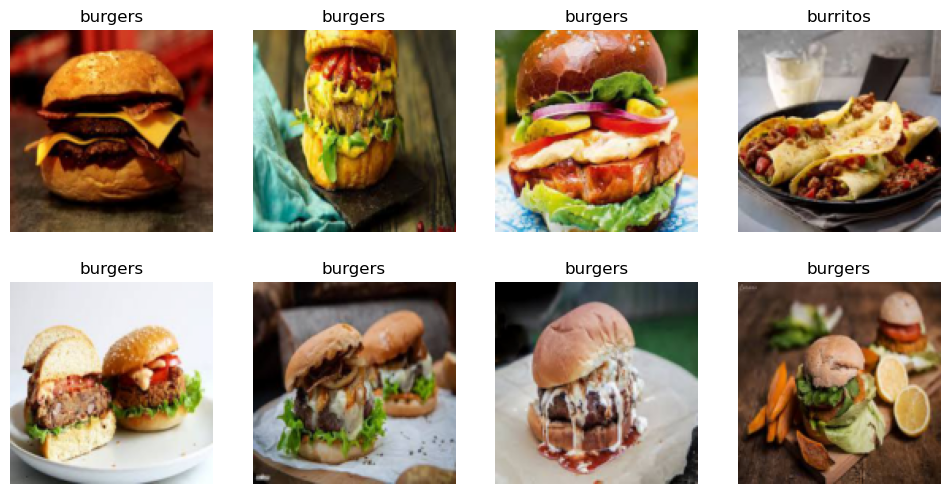

In [5]:
u7.set_seed(42)
u7.plot_image_dataset(dataset_path, nitems=8, nrows=2, size=128)

<h2>Exercise 2</h2>

<div class="alert alert-warning">
    <b>Exercise 2.1. [5 Points]</b>
    <ul>
        <li>Using <code>u7.create_cnn()</code>, create a <b>pretrained</b> CNN with 18 layers and the number of classes set according to your dataset (the other settings do not matter).</li>
        <li>Store the model in a variable called <code>model</code>.</li>
    </ul>
</div>

In [6]:
u7.set_seed(42)
model = u7.create_cnn(num_classes=2,
                      num_layers=18,
                      batchnorm=False,
                      dropout=0,
                      residuals=False,
                      pretrained=True)

<div class="alert alert-warning">
    <b>Important:</b> Plot the weights of the first layer (already done, only need to execute the cell).
</div>

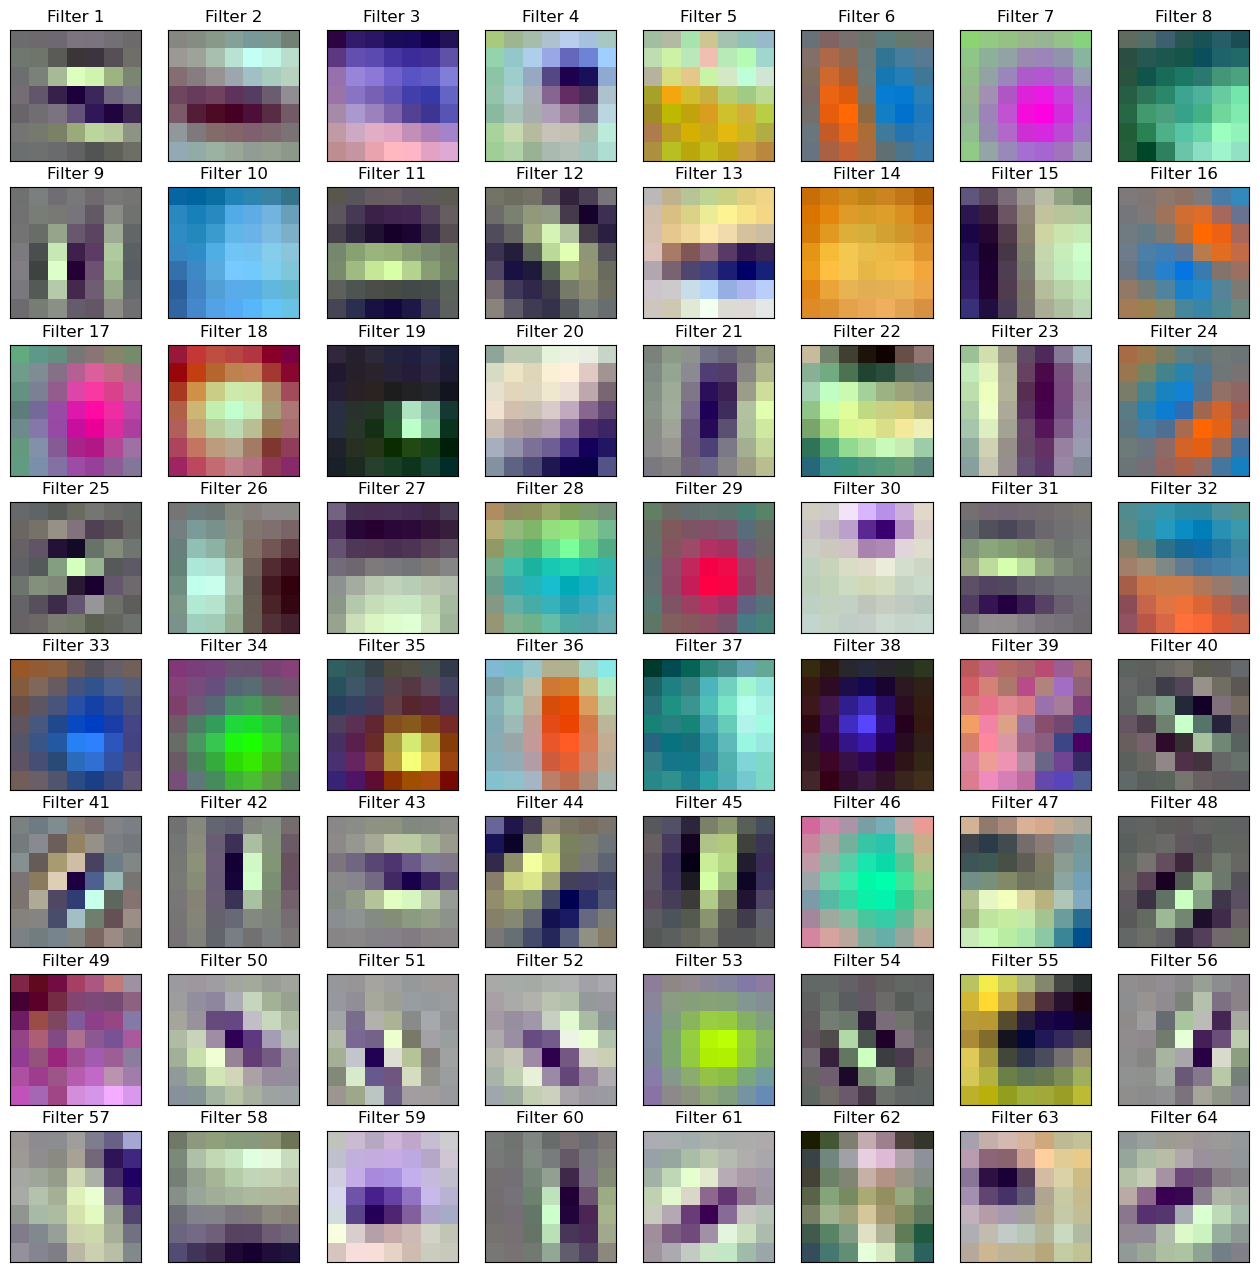

In [7]:
weights = u7.visualize_cnn_filters(model, ncols=8, image_size=2)

<h2>Exercise 3</h2>

Using the dataset that you loaded in Exercise 1, perform the following tasks:

<div class="alert alert-warning">
    <b>Exercise 3.1. [5 Points]</b>
    <ul>
        <li>Create a CNN with 18 layers, no dropout, no batch normalization, no residuals, and no pretraining, using <code>u7.create_cnn()</code>.</li>
        <li><b>Important:</b> Set the seed to 100 before calling <code>u7.create_cnn()</code>.</li>
    </ul>
</div>

In [8]:
u7.set_seed(100)
model_2 = u7.create_cnn(num_classes=2, 
                        num_layers=18, 
                        batchnorm=False, 
                        dropout=0, 
                        residuals=False, 
                        pretrained=False)

<div class="alert alert-warning">
    <b>Exercise 3.2. [5 Points]</b>
    <ul>
        <li>Plot the weights of the first layer and store them in a variable called <code>weights_before_training</code>.</li>
    </ul>
</div>

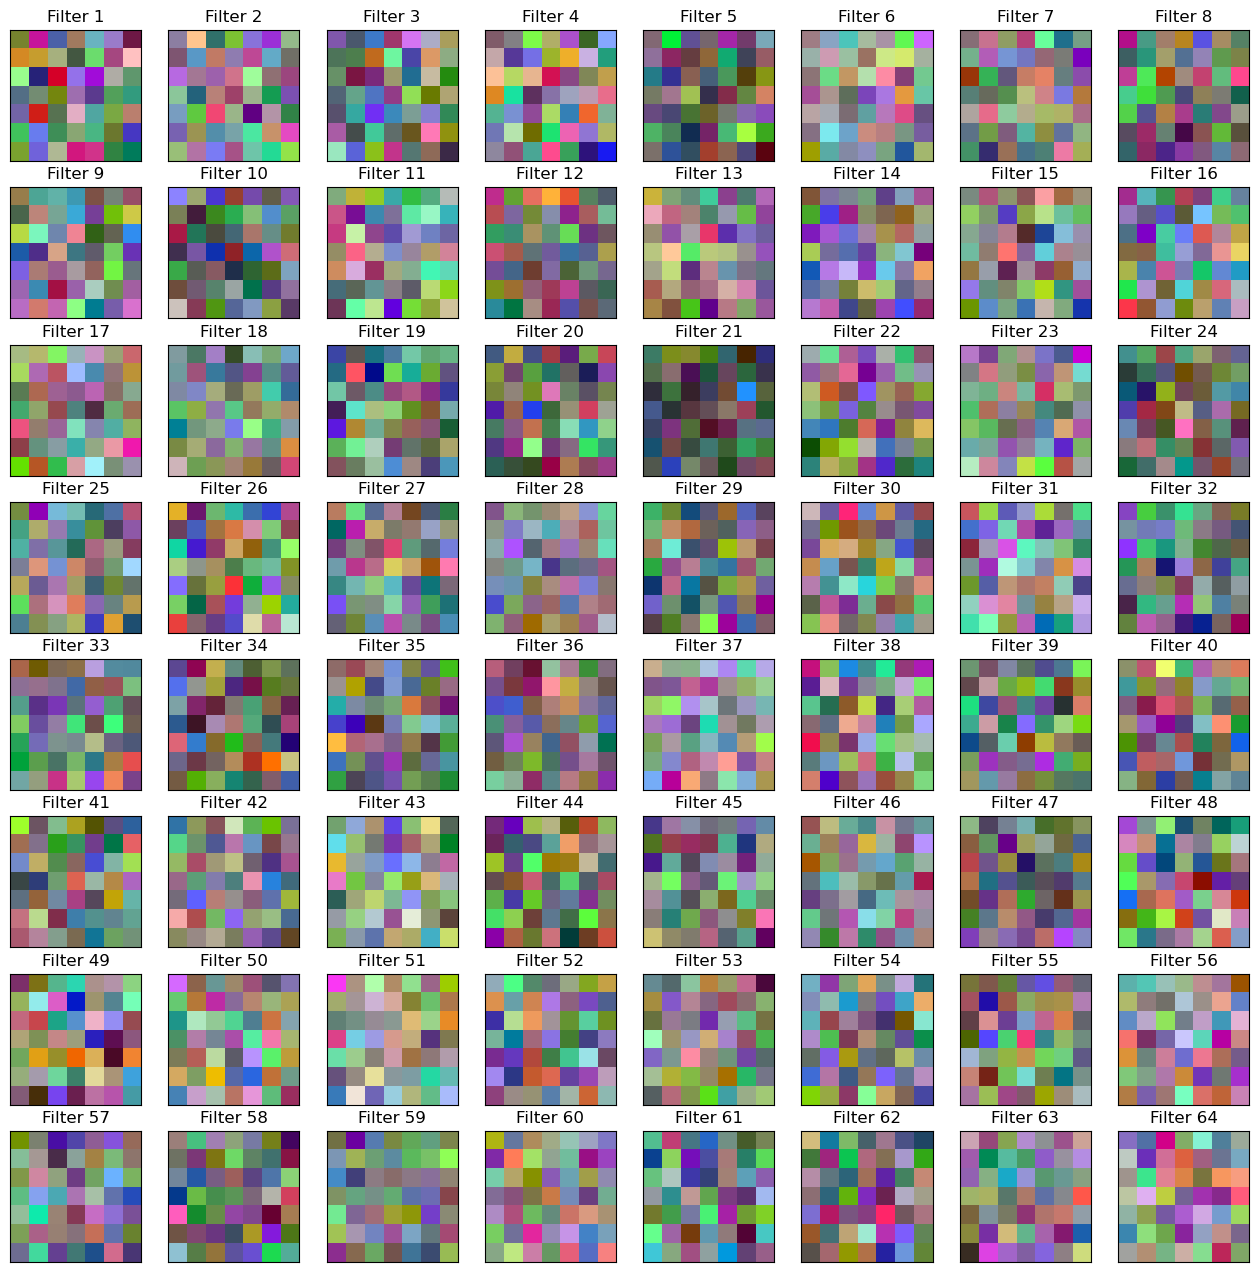

In [9]:
weights_before_training = u7.visualize_cnn_filters(model_2, ncols=8, image_size=2)

<div class="alert alert-warning">
    <b>Exercise 3.3. [5 Points]</b>
    <ul>
        <li>Train the model for 5 iterations/epochs, with a constant learning rate of 0.005 (no learning rate schedule), momentum of 0.9, and without plotting curves, using <code>u7.run_gradient_descent()</code>.</li>
        <li>Hint: You may omit the validation set to speed up the computation, as it is not needed.</li>
    </ul>
</div>

In [10]:
loss = torch.nn.functional.cross_entropy

u7.run_gradient_descent(
    model=model_2,
    loss=loss,
    training_set=dataset.train,
    valid_set=dataset.valid,
    iterations=5,
    learning_rate=0.005,
    momentum=0.9,
    lr_schedule=None
)

  0%|          | 0/504 [00:00<?, ?it/s]

Epoch  1 finished with training loss: 0.694913 and validation loss: 0.693715
Epoch  2 finished with training loss: 0.691782 and validation loss: 0.694233
Epoch  3 finished with training loss: 0.671126 and validation loss: 0.711090
Epoch  4 finished with training loss: 0.626407 and validation loss: 0.694974
Epoch  5 finished with training loss: 0.625472 and validation loss: 0.806383


,training loss,validation loss
1,0.694913,0.693715
2,0.691782,0.694233
3,0.671126,0.711090
4,0.626407,0.694974
5,0.625472,0.806383


<div class="alert alert-warning">
    <b>Exercise 3.4. [5 Points]</b>
    <ul>
        <li>Plot the weights of the first layer again and store them in a variable called <code>weights_after_training</code>.</li>
    </ul>
</div>

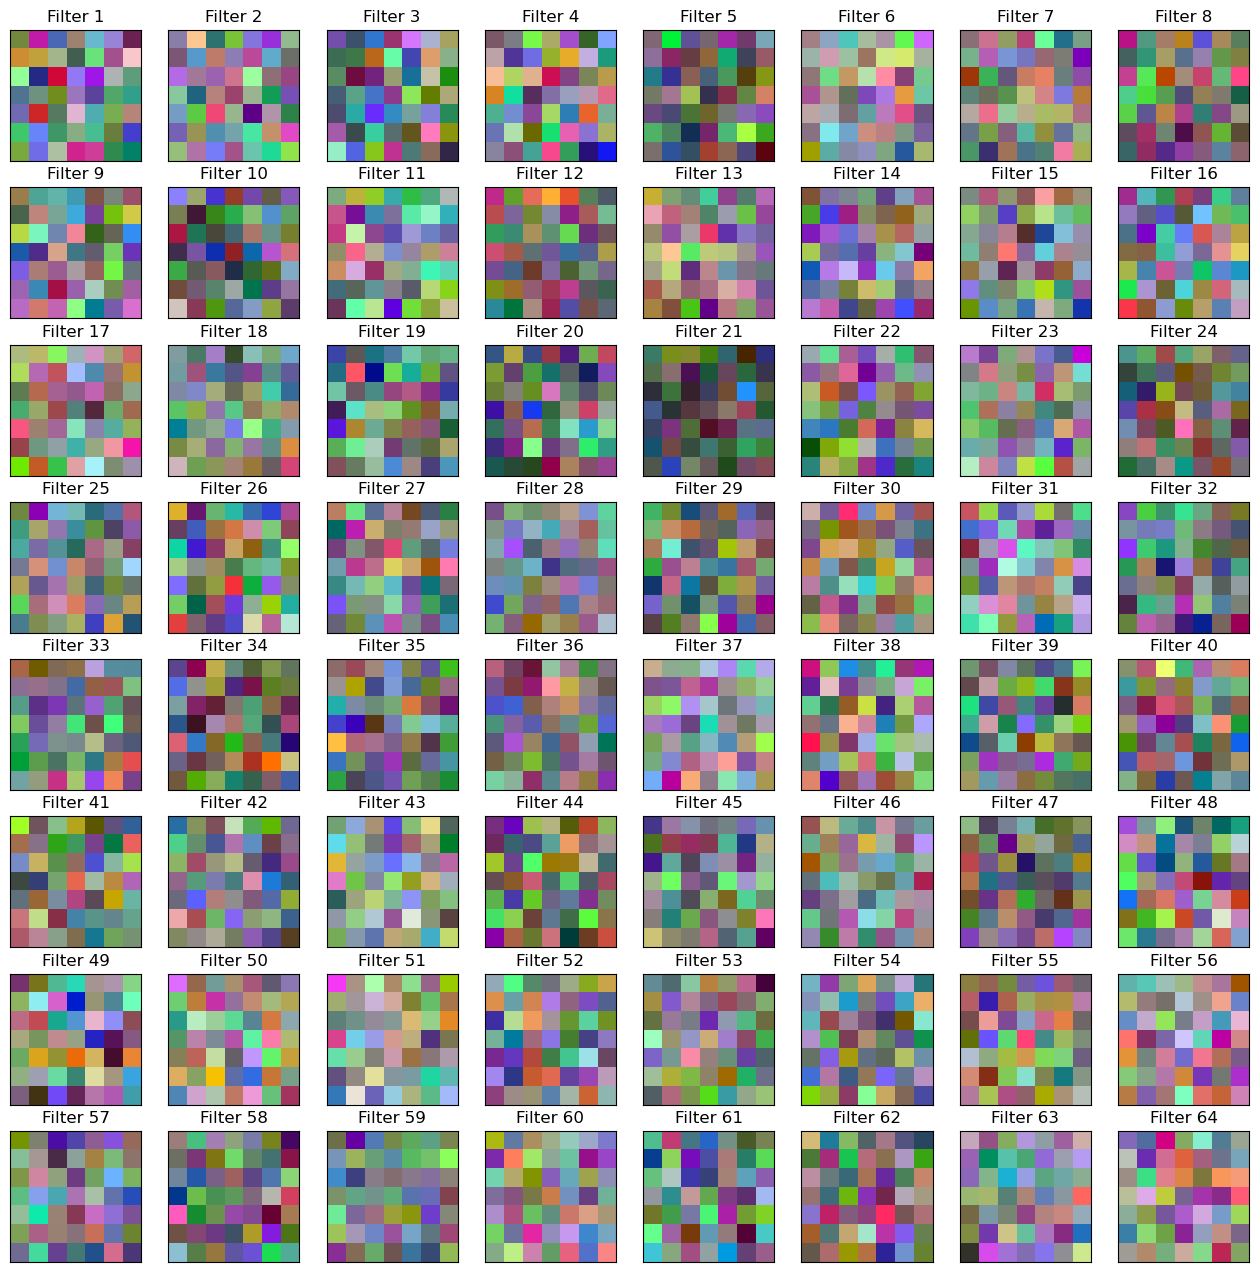

In [11]:
weights_after_training = u7.visualize_cnn_filters(model_2, ncols=8, image_size=2)

<div class="alert alert-warning">
    <b>Exercise 3.5. [5 Points]</b>
    <ul>
        <li>Compare the filters plotted before and after training. Do you see any difference? Did the filters change visibly during training?</li>
    </ul>
</div>

I do not see any difference just by looking at the plots, they did not change visibly.

<div class="alert alert-warning">
    <b>Important:</b> Print the absolute difference of weights before and after training (already done, only need to execute the cell). This might help you in answering the above question.
</div>

In [12]:
(weights_before_training - weights_after_training).abs().sum().item()

15.386033058166504

<h2>Exercise 4</h2>

Similar to before, perform the following tasks:

<div class="alert alert-warning">
    <b>Exercise 4.1. [5 Points]</b>
    <ul>
        <li>Create a CNN with 18 layers, no dropout, <b>with</b> batch normalization, <b>with</b> residuals, and no pretraining, using <code>u7.create_cnn()</code>.</li>
        <li><b>Important:</b> Set the seed to 100 before calling <code>u7.create_cnn()</code>.</li>
    </ul>
</div>

In [13]:
u7.set_seed(100)
model_3 = u7.create_cnn(num_classes=2,
                        num_layers=18,
                        batchnorm=True,
                        dropout=0,
                        residuals=True,
                        pretrained=False)

<div class="alert alert-warning">
    <b>Exercise 4.2. [5 Points]</b>
    <ul>
        <li>Plot the weights of the first layer and store them in a variable called <code>weights_before_training</code>.</li>
    </ul>
</div>

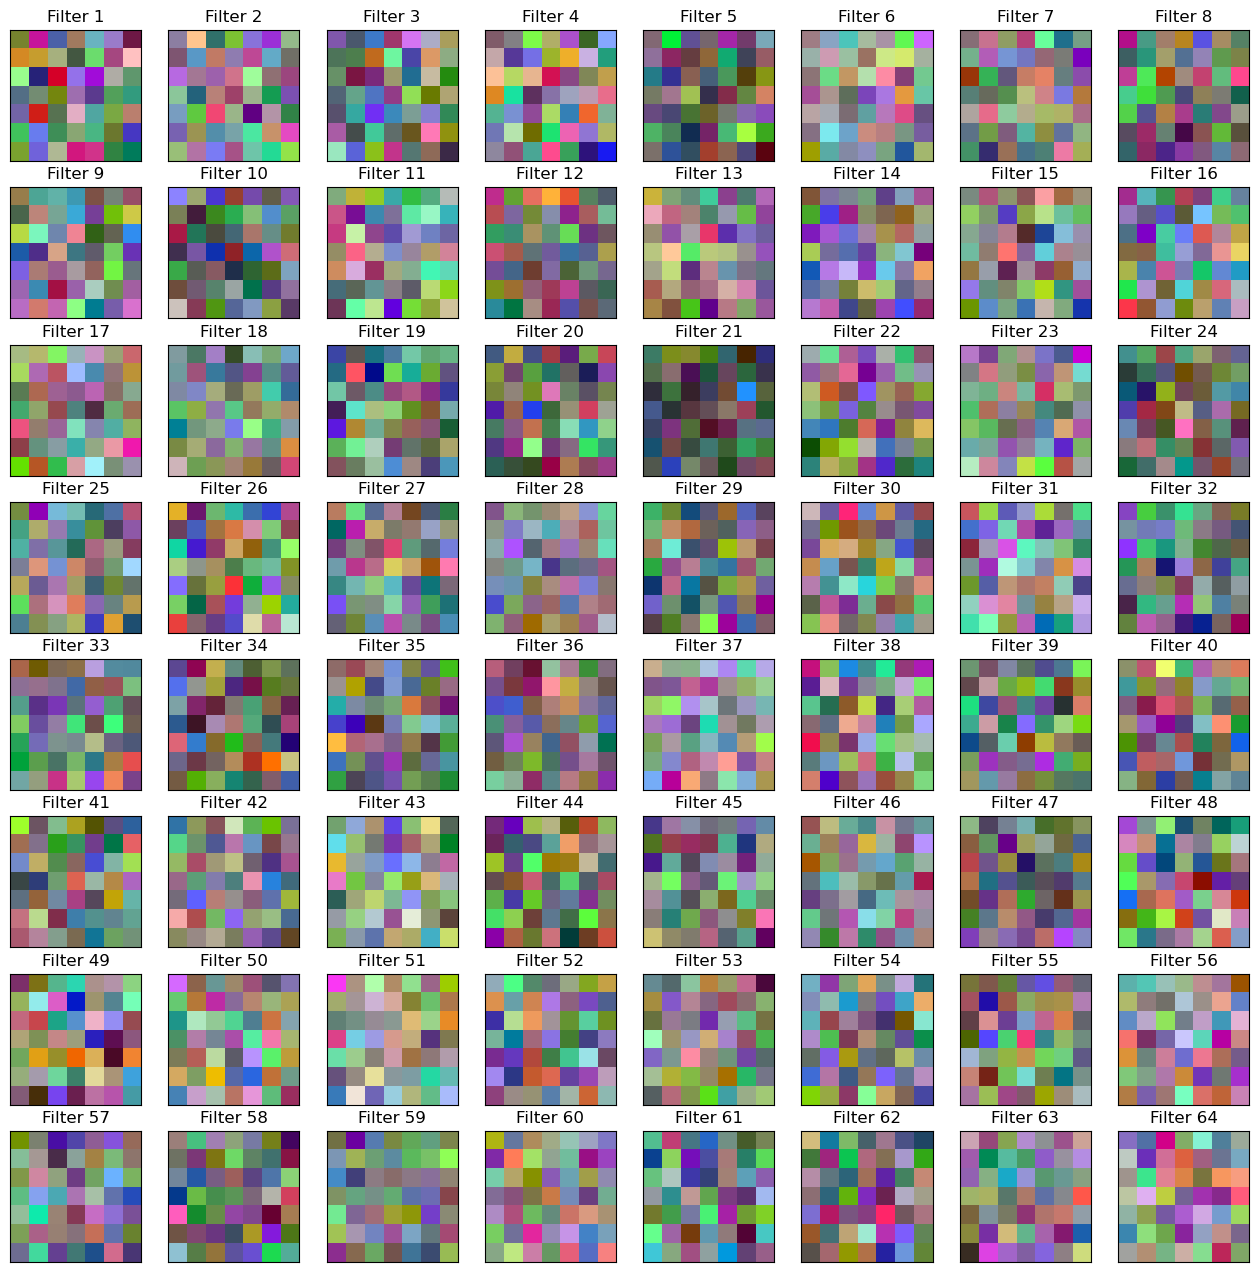

In [14]:
weights_before_training = u7.visualize_cnn_filters(model_3, ncols=8, image_size=2)

<div class="alert alert-warning">
    <b>Exercise 4.3. [5 Points]</b>
    <ul>
        <li>Train the model for 5 iterations, with a constant learning rate of 0.005 (no learning rate schedule), momentum of 0.9, and without plotting curves, using <code>u7.run_gradient_descent()</code>.</li>
        <li>Hint: You may omit the validation set to speed up the computation, as it is not needed.</li>
    </ul>
</div>

In [15]:
loss = torch.nn.functional.cross_entropy

u7.run_gradient_descent(
    model=model_3,
    loss=loss,
    training_set=dataset.train,
    valid_set=dataset.valid,
    iterations=5,
    learning_rate=0.005,
    momentum=0.9,
    lr_schedule=None
)

  0%|          | 0/504 [00:00<?, ?it/s]

Epoch  1 finished with training loss: 0.707527 and validation loss: 0.691198
Epoch  2 finished with training loss: 0.620264 and validation loss: 0.813992
Epoch  3 finished with training loss: 0.584046 and validation loss: 2.422861
Epoch  4 finished with training loss: 0.614301 and validation loss: 2.426790
Epoch  5 finished with training loss: 0.628272 and validation loss: 5.351308


,training loss,validation loss
1,0.707527,0.691198
2,0.620264,0.813992
3,0.584046,2.422861
4,0.614301,2.426790
5,0.628272,5.351308


<div class="alert alert-warning">
    <b>Exercise 4.4. [5 Points]</b>
    <ul>
        <li>Plot the weights of the first layer again and store them in a variable called <code>weights_after_training</code>.</li>
    </ul>
</div>

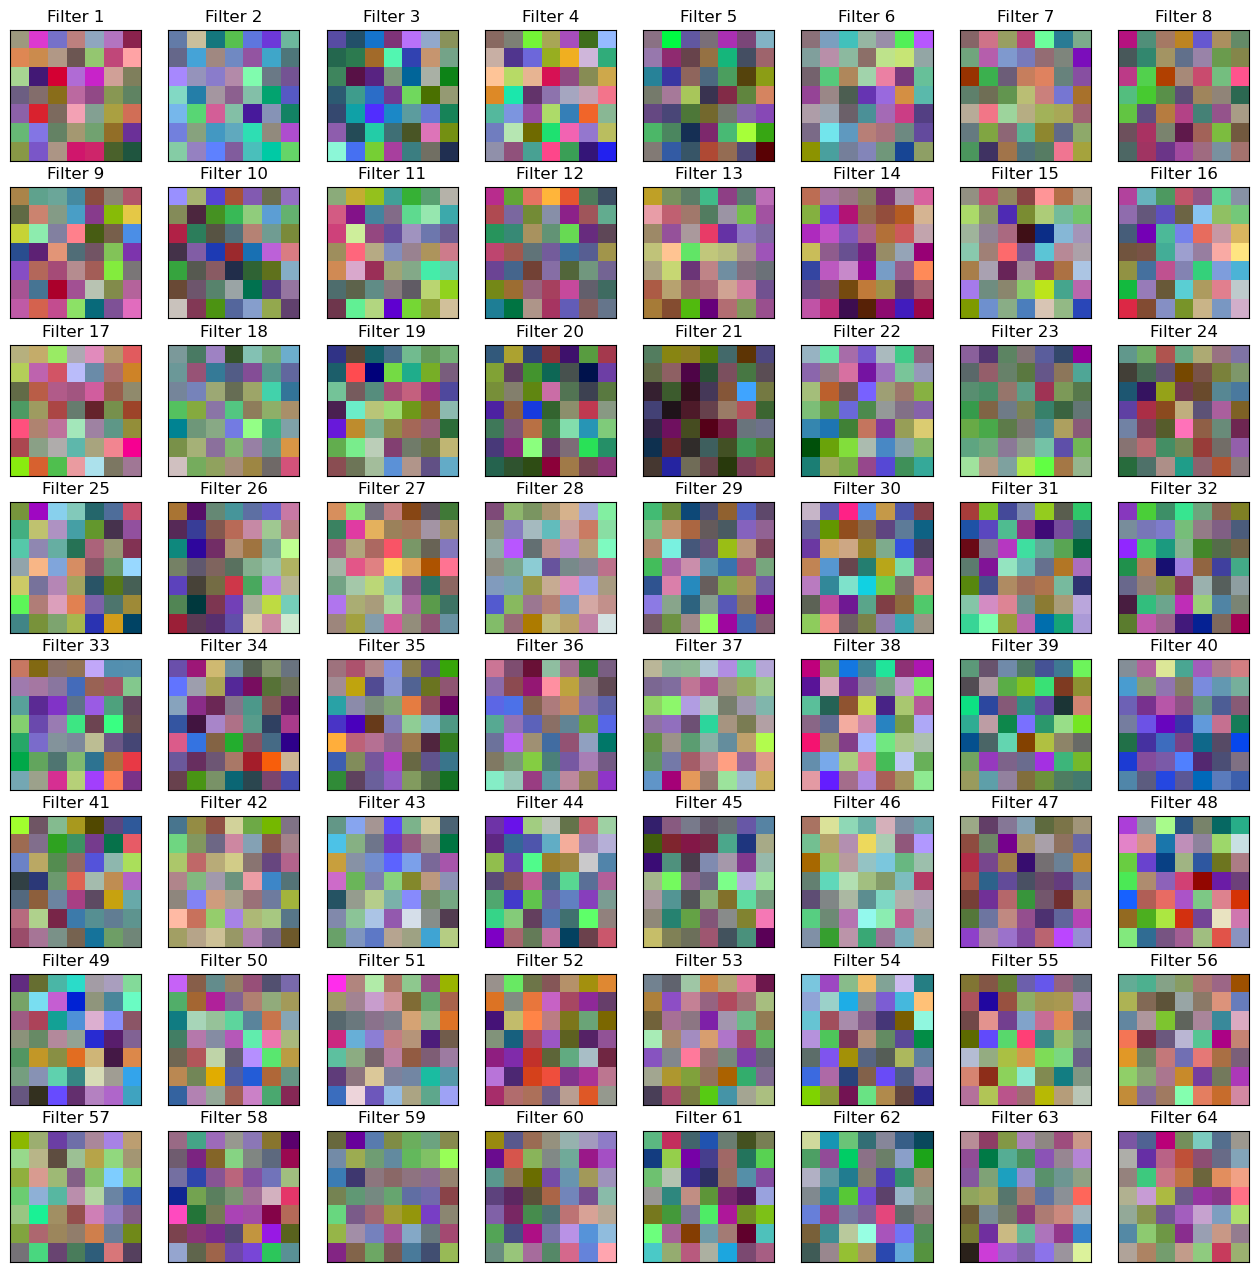

In [16]:
weights_after_training = u7.visualize_cnn_filters(model_3, ncols=8, image_size=2)

<div class="alert alert-warning">
    <b>Exercise 4.5. [5 Points]</b>
    <ul>
        <li>Compare the filters plotted before and after training. Do you see any difference? Did the filters change visibly during training?</li>
    </ul>
</div>

Yes, the filters did change visibly, the contrast and pixel intensity have increased noticably.

<div class="alert alert-warning">
    <b>Important:</b> Print the absolute difference of weights before and after training (already done, only need to execute the cell). This might help you in answering the above question.
</div>

In [17]:
(weights_before_training - weights_after_training).abs().sum().item()

87.0926513671875

<h2>Exercise 5</h2>

Magic vs. you!

<div class="alert alert-warning">
    <b>Exercise 5.1. [5 Points]</b>
    <ul>
        <li>Using <code>u7.perform_magic()</code>, calculate the error rate on the dataset specified in the beginning of the notebook (use the same path).</li>
        <li>Use a validation size of 20% and let it run for 2 iterations/epochs. All other settings should use the default values.</li>
        <li><b>Important:</b> Set the seed to 100 before calling <code>u7.perform_magic()</code>.</li>
    </ul>
</div>

In [18]:
u7.set_seed(100)
result = u7.perform_magic(dataset_path, valid_size=0.2, iterations=2)

epoch,train_loss,valid_loss,error_rate,time
0,0.561275,0.230446,0.079365,00:35
1,0.317019,0.226029,0.079365,00:34


<div class="alert alert-warning">
    <b>Exercise 5.2. [30 Points]</b>
    <ul>
        <li>Now it's your time! Can you get the same or a lower error rate on the validation set than the magic from above?</li>
        <li>Use the same validation size of 20% when manually loading the dataset with <code>u7.load_image_dataset()</code>. All other settings are completely up to you!</li>
        <li><b>Important:</b> Set the seed to 100 before all following calls:
            <ul>
                <li><code>u7.load_image_dataset()</code></li>
                <li><code>u7.create_cnn()</code> (if you want to use this utility function, you can also set up your own architecture, but make sure to set the seed before that, too)</li>
                <li><code>u7.run_gradient_descent()</code></li>
            </ul>
        </li>
        <li>Note: In the unlikely case that <code>u7.perform_magic()</code> from above has an error rate of 0, try to get as close as possible to this result (within about 5% error rate).</li>
    </ul>
</div>

  0%|          | 0/504 [00:00<?, ?it/s]

Epoch  1 finished with training loss: 0.518930 and validation loss: 0.257139
Epoch  2 finished with training loss: 0.186179 and validation loss: 0.186560
Epoch  3 finished with training loss: 0.116062 and validation loss: 0.351701
Epoch  4 finished with training loss: 0.138317 and validation loss: 0.149574
Epoch  5 finished with training loss: 0.087018 and validation loss: 0.219005
Epoch  6 finished with training loss: 0.100340 and validation loss: 0.145474
Epoch  7 finished with training loss: 0.074492 and validation loss: 0.192717
Epoch  8 finished with training loss: 0.063531 and validation loss: 0.147294
Epoch  9 finished with training loss: 0.055685 and validation loss: 0.200420
Epoch 10 finished with training loss: 0.074429 and validation loss: 0.144229
Epoch 11 finished with training loss: 0.072984 and validation loss: 0.202549
Epoch 12 finished with training loss: 0.073481 and validation loss: 0.146292
Epoch 13 finished with training loss: 0.060485 and validation loss: 0.177834

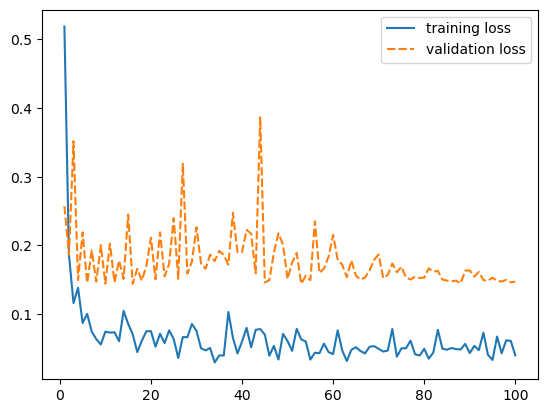

,training loss,validation loss
1,0.518930,0.257139
2,0.186179,0.186560
3,0.116062,0.351701
4,0.138317,0.149574
5,0.087018,0.219005
...,...,...
96,0.067278,0.148632
97,0.042791,0.147343
98,0.061672,0.149699
99,0.061024,0.146100


In [33]:
u7.set_seed(100)
dataset_2 = u7.load_image_dataset(dataset_path, valid_size=0.2, batch_size=64, augment=True)

model_4 = u7.create_cnn(num_classes=2,
                        num_layers=34,
                        batchnorm=True,
                        dropout=0.25,
                        residuals=True,
                        pretrained=True)

loss = torch.nn.functional.cross_entropy

u7.run_gradient_descent(
    model=model_4,
    loss=loss,
    training_set=dataset_2.train,
    valid_set=dataset_2.valid,
    iterations=100,
    learning_rate=0.0095,
    momentum=0.92,
    lr_schedule="linear",
    plot_curves=True
)

In [34]:
print("Training set:")
print(u7.evaluate_model(model_4, dataset.train, loss=loss, error_rate=u7.multiclass_error_rate))
print("Validation set:")
print(u7.evaluate_model(model_4, dataset.valid, loss=loss, error_rate=u7.multiclass_error_rate))

Training set:
{'loss': 0.02165511723548647, 'error_rate': 0.007936507936507936}
Validation set:
{'loss': 0.14734116433158753, 'error_rate': 0.07142856953636048}
